In [84]:
import pandas as pd
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns

# ignore Deprecation Warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.utils import plot_model

In [85]:
ingredients_df = pd.read_csv('data/recipes.csv')

In [86]:
recipe_df = pd.read_csv('data/full_dataset.csv')

In [87]:
ingredients_df.shape

(57691, 384)

In [88]:
recipe_df.shape

(2231142, 7)

In [89]:
ingredients_df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [90]:
recipe_df.head(10)

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."
5,5,Cheeseburger Potato Soup,"[""6 baking potatoes"", ""1 lb. of extra lean gro...","[""Wash potatoes; prick several times with a fo...",www.cookbooks.com/Recipe-Details.aspx?id=20115,Gathered,"[""baking potatoes"", ""extra lean ground beef"", ..."
6,6,Rhubarb Coffee Cake,"[""1 1/2 c. sugar"", ""1/2 c. butter"", ""1 egg"", ""...","[""Cream sugar and butter."", ""Add egg and beat ...",www.cookbooks.com/Recipe-Details.aspx?id=210288,Gathered,"[""sugar"", ""butter"", ""egg"", ""buttermilk"", ""flou..."
7,7,Scalloped Corn,"[""1 can cream-style corn"", ""1 can whole kernel...","[""Mix together both cans of corn, crackers, eg...",www.cookbooks.com/Recipe-Details.aspx?id=876969,Gathered,"[""cream-style corn"", ""whole kernel corn"", ""cra..."
8,8,Nolan'S Pepper Steak,"[""1 1/2 lb. round steak (1-inch thick), cut in...","[""Roll steak strips in flour."", ""Brown in skil...",www.cookbooks.com/Recipe-Details.aspx?id=375254,Gathered,"[""tomatoes"", ""water"", ""onions"", ""Worcestershir..."
9,9,Millionaire Pie,"[""1 large container Cool Whip"", ""1 large can c...","[""Empty Cool Whip into a bowl."", ""Drain juice ...",www.cookbooks.com/Recipe-Details.aspx?id=794547,Gathered,"[""pineapple"", ""condensed milk"", ""lemons"", ""pec..."


In [91]:
recipe_df.shape

(2231142, 7)

In [92]:
recipe_df["source"].value_counts()

source
Gathered     1643098
Recipes1M     588044
Name: count, dtype: int64

In [93]:
ingredients_df.head()

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
1,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
2,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
3,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No
4,Vietnamese,No,No,No,No,No,No,No,No,No,...,No,No,No,No,No,No,No,No,No,No


In [94]:
ingredients_df.replace({'Yes': 1, 'No': 0}, inplace=True)

In [150]:
ingredients_df.shape

(57691, 384)

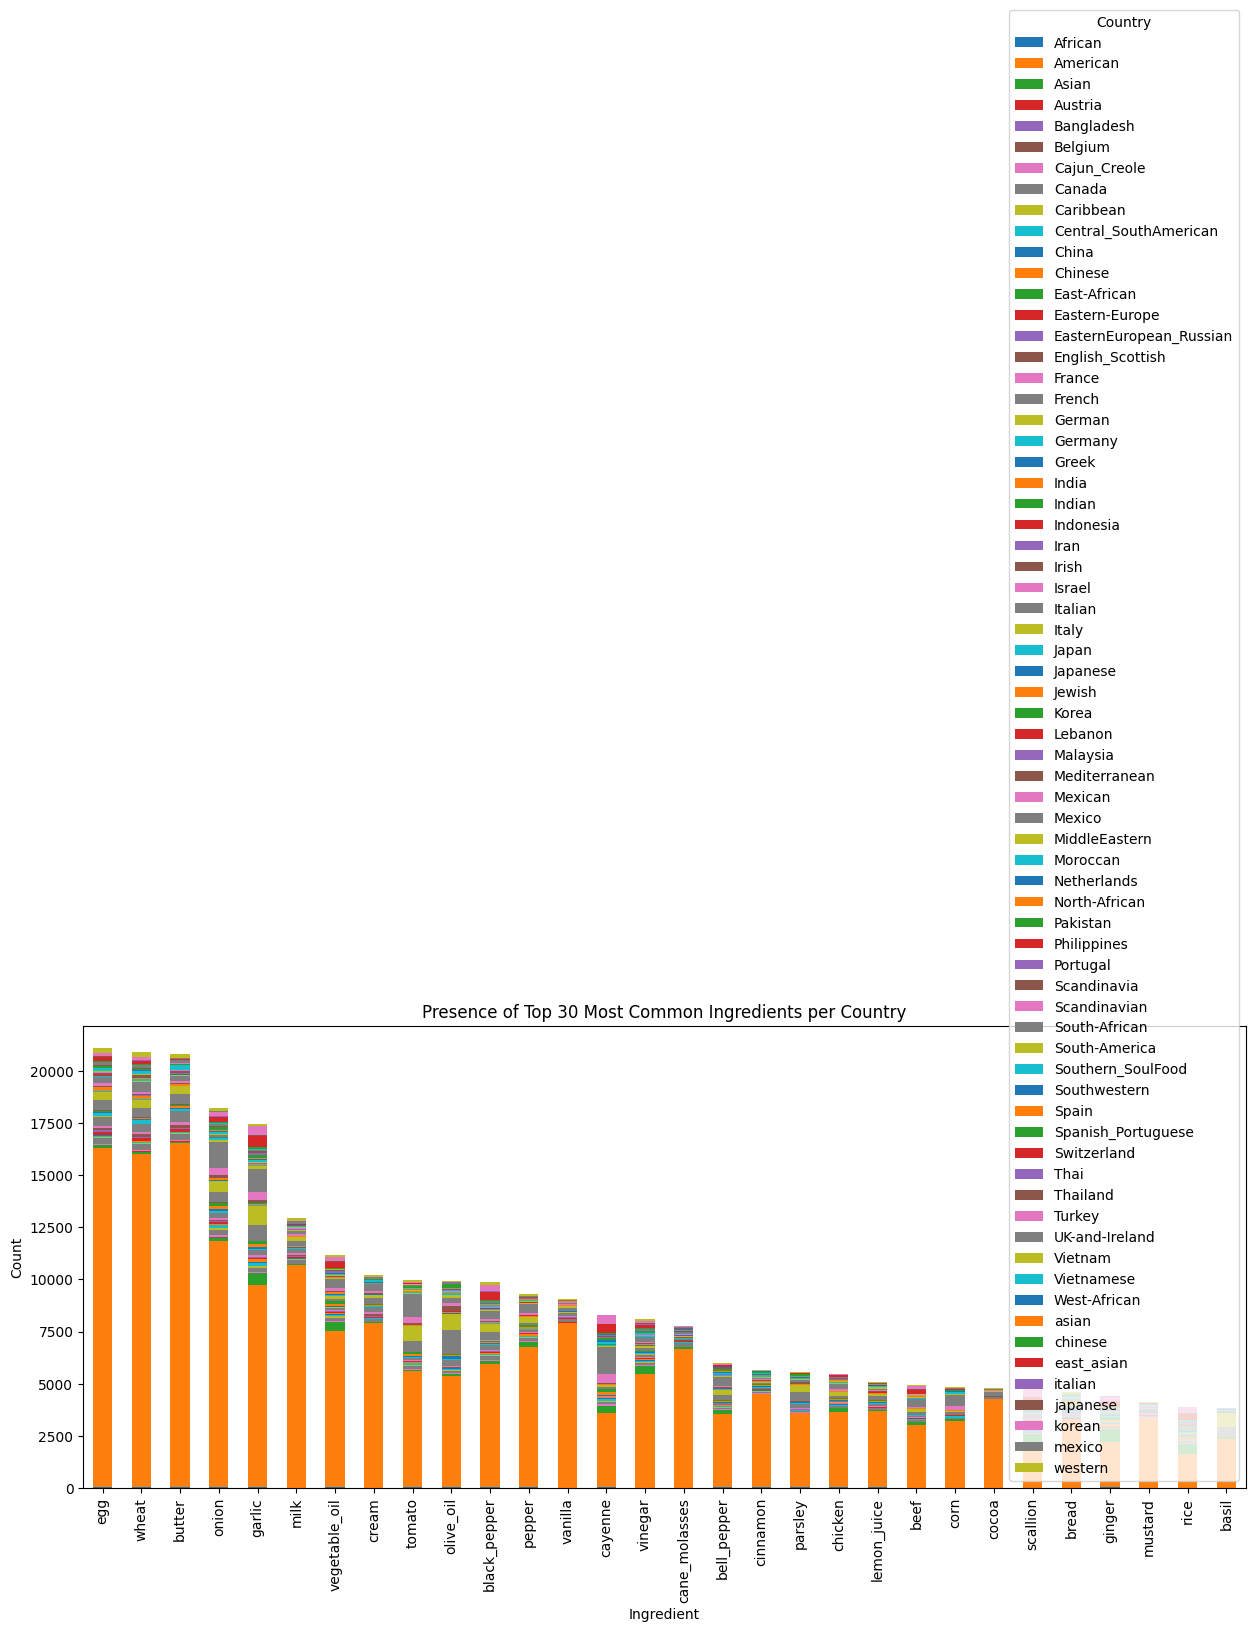

In [95]:

country_ingredient_counts = ingredients_df.groupby('country').sum()

total_ingredient_counts = country_ingredient_counts.sum()

top_30_ingredients = total_ingredient_counts.nlargest(30).index

country_ingredient_counts_top30 = country_ingredient_counts[top_30_ingredients]

country_ingredient_counts_top30.transpose().plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Presence of Top 30 Most Common Ingredients per Country')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.show()

In [96]:
ingredients_df['country'].unique()

array(['Vietnamese', 'Indian', 'Spanish_Portuguese', 'Jewish', 'French',
       'Central_SouthAmerican', 'Cajun_Creole', 'Thai', 'Scandinavian',
       'Greek', 'American', 'African', 'MiddleEastern',
       'EasternEuropean_Russian', 'Italian', 'Irish', 'Mexican',
       'Chinese', 'German', 'Mediterranean', 'Japanese', 'Moroccan',
       'Southern_SoulFood', 'English_Scottish', 'Asian', 'Southwestern',
       'chinese', 'mexico', 'japanese', 'east_asian', 'asian', 'western',
       'korean', 'italian', 'Canada', 'Turkey', 'Caribbean', 'Bangladesh',
       'India', 'France', 'Italy', 'Israel', 'Korea', 'Iran',
       'Eastern-Europe', 'South-African', 'UK-and-Ireland', 'China',
       'Belgium', 'Germany', 'South-America', 'Spain', 'Netherlands',
       'Scandinavia', 'Philippines', 'Indonesia', 'East-African',
       'Vietnam', 'Thailand', 'Switzerland', 'West-African',
       'North-African', 'Pakistan', 'Portugal', 'Mexico', 'Lebanon',
       'Malaysia', 'Austria', 'Japan'], dtype=

In [97]:
ingredients_df.replace({'Yes': 1, 'No': 0}, inplace=True)
country_to_continent = {
    'Vietnamese': 'Asia', 'Indian': 'Asia', 'Spanish_Portuguese': 'Latin America',
    'Jewish': 'Middle East', 'French': 'Europe', 'Central_SouthAmerican': 'Latin America',
    'Cajun_Creole': 'Latin America', 'Thai': 'Asia', 'Scandinavian': 'Europe',
    'Greek': 'Europe', 'American': 'North America', 'African': 'Africa', 'MiddleEastern': 'Middle East',
    'EasternEuropean_Russian': 'Europe', 'Italian': 'Europe', 'Irish': 'Europe', 'Mexican': 'North America',
    'Chinese': 'Asia', 'German': 'Europe', 'Mediterranean': 'Europe', 'Japanese': 'Asia', 'Moroccan': 'Europe',
    'Southern_SoulFood': 'North America', 'English_Scottish': 'Europe', 'Asian': 'Asia', 'Southwestern': 'North America',
    'chinese': 'Asia', 'mexico': 'North America', 'japanese': 'Asia', 'east_asian': 'Asia', 'asian': 'Asia',
    'western': 'Europe', 'korean': 'Asia', 'italian': 'Europe', 'Canada': 'North America', 'Turkey': 'Middle East',
    'Caribbean': 'Latin America', 'Bangladesh': 'Asia', 'India': 'Asia', 'France': 'Europe', 'Italy': 'Europe',
    'Israel': 'Middle East', 'Korea': 'Asia', 'Iran': 'Middle East', 'Eastern-Europe': 'Europe',
    'South-African': 'Africa', 'UK-and-Ireland': 'Europe', 'China': 'Asia', 'Belgium': 'Europe', 'Germany': 'Europe',
    'South-America': 'Latin America', 'Spain': 'Europe', 'Netherlands': 'Europe', 'Scandinavia': 'Europe',
    'Philippines': 'Asia', 'Indonesia': 'Asia', 'East-African': 'Africa', 'Vietnam': 'Asia', 'Thailand': 'Asia',
    'Switzerland': 'Europe', 'West-African': 'Africa', 'North-African': 'Africa', 'Pakistan': 'Asia',
    'Portugal': 'Europe', 'Mexico': 'North America', 'Lebanon': 'Middle East', 'Malaysia': 'Asia', 'Austria': 'Europe',
    'Japan': 'Asia'
}


ingredients_df['continent'] = ingredients_df['country'].map(country_to_continent)
ingredients_continent = ingredients_df.drop('country', axis=1)
ingredients_continent.head(3)



,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini,continent
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asia
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asia
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Asia


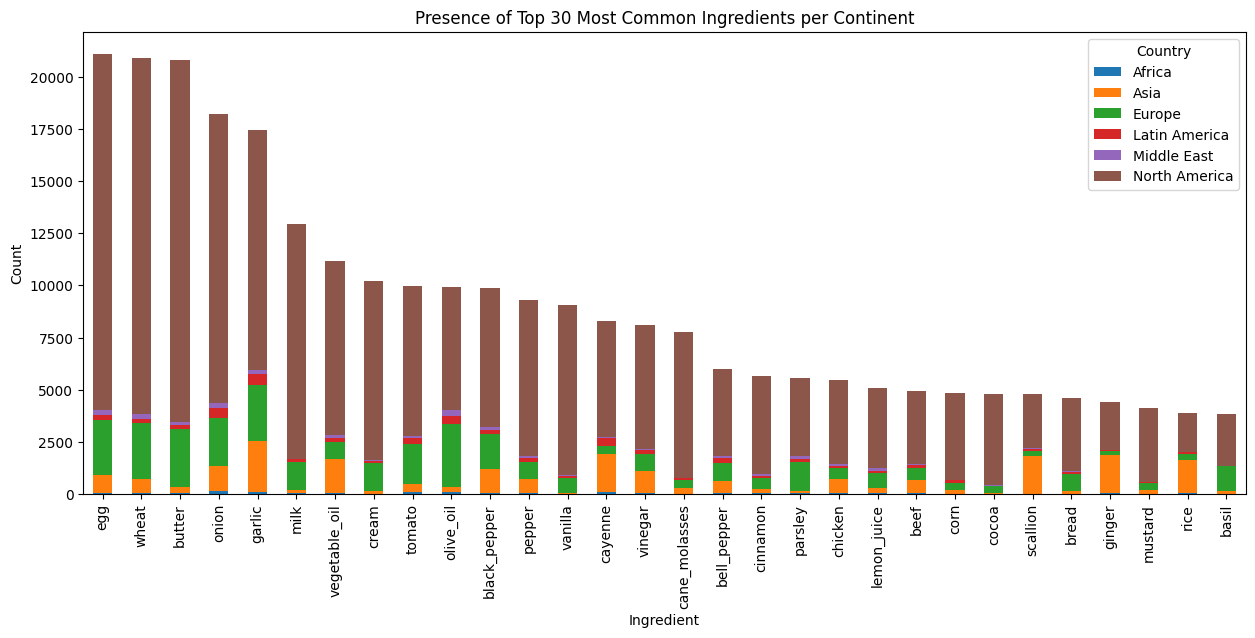

In [98]:

continent_ingredient_counts = ingredients_continent.groupby('continent').sum()

total_ingredient_counts = continent_ingredient_counts.sum()

top_30_ingredients = total_ingredient_counts.nlargest(30).index

continent_ingredient_counts_top30 = continent_ingredient_counts[top_30_ingredients]

continent_ingredient_counts_top30.transpose().plot(kind='bar', stacked=True, figsize=(15, 6))
plt.title('Presence of Top 30 Most Common Ingredients per Continent')
plt.xlabel('Ingredient')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Country')
plt.show()

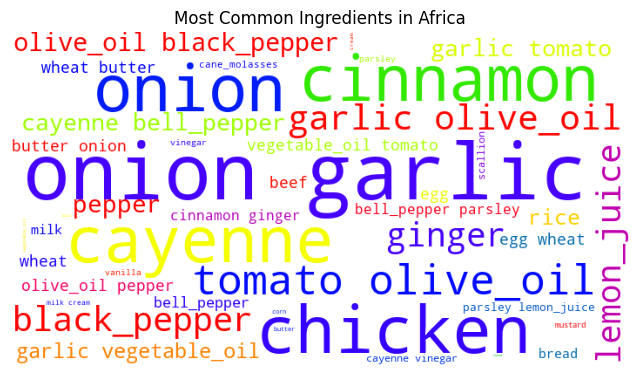

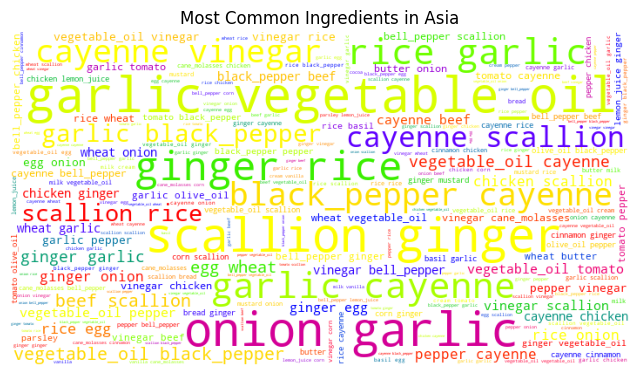

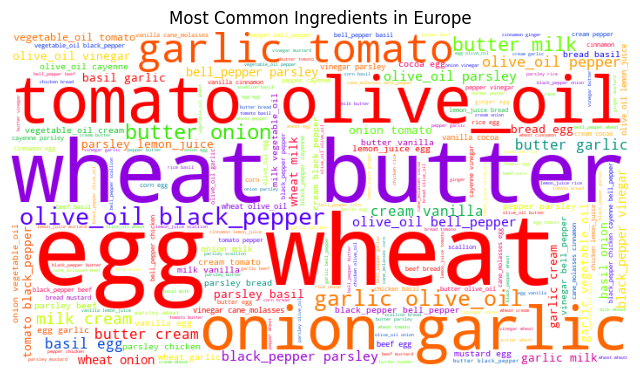

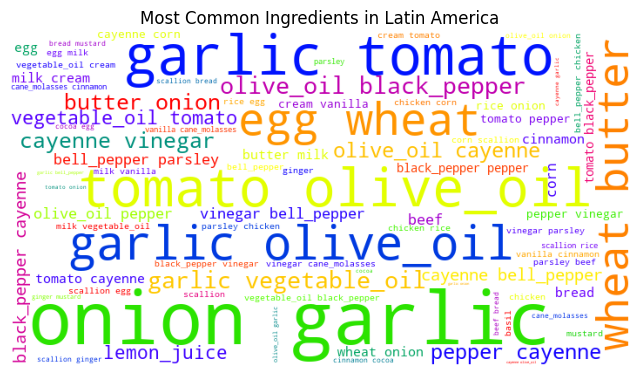

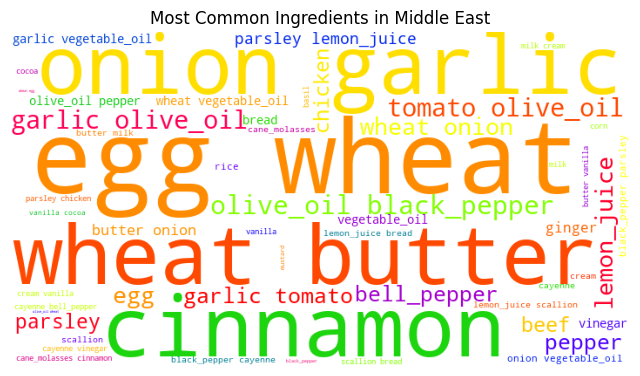

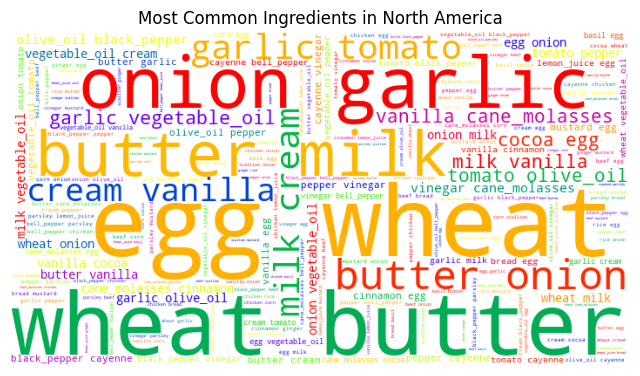

In [99]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def dataframe_to_word_list(df):
    word_list = []
    for index, row in df.iterrows():
        for column, value in row.items():
            word_list.extend([column] * value)
    return word_list

def generate_wordcloud_for_continent(continent):
    # Ottieni gli ingredienti più comuni per il continente specificato
    top_ingredients_in_continent = continent_ingredient_counts_top30.loc[continent].index
    
    # Filtriamo il DataFrame per il continente specificato e selezioniamo solo le colonne degli ingredienti più comuni
    ingredients_in_continent = ingredients_continent.loc[ingredients_continent['continent'] == continent, top_ingredients_in_continent]
    
    # Usiamo la funzione per convertire il DataFrame in una lista di parole
    word_list = dataframe_to_word_list(ingredients_in_continent)
    
    # Uniamo la lista di parole in una singola stringa di testo per il WordCloud
    text_for_wordcloud = ' '.join(map(str, word_list))
    
    # Creiamo il WordCloud per gli ingredienti nel continente specificato
    plt.figure(figsize=(8, 8))
    wordcloud = WordCloud(
        background_color='white',
        width=712,
        height=384,
        colormap='prism'
    ).generate(text_for_wordcloud)
    
    # Visualizziamo il WordCloud
    plt.imshow(wordcloud)
    plt.title(f'Most Common Ingredients in {continent}')
    plt.axis('off') # Disabilitiamo gli assi x e y
    plt.show()

# Generiamo il WordCloud per gli ingredienti più utilizzati per ogni continente
for continent in continent_ingredient_counts_top30.index:
    generate_wordcloud_for_continent(continent)
   

In [100]:
ingredients_df["country"].value_counts()

country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

In [101]:
ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 385 entries, country to continent
dtypes: int64(383), object(2)
memory usage: 169.5+ MB


In [102]:
ingredients_df.isnull().sum()

country       0
almond        0
angelica      0
anise         0
anise_seed    0
             ..
yam           0
yeast         0
yogurt        0
zucchini      0
continent     0
Length: 385, dtype: int64

In [103]:
ingredients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57691 entries, 0 to 57690
Columns: 385 entries, country to continent
dtypes: int64(383), object(2)
memory usage: 169.5+ MB


In [104]:
ingredients_df.describe()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
count,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,...,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000,57691.000000
mean,0.040370,0.000017,0.003883,0.001508,0.042173,0.000641,0.010851,0.000191,0.000225,0.006777,...,0.002583,0.006448,0.038342,0.012723,0.017784,0.000572,0.001491,0.058969,0.018322,0.019188
std,0.196828,0.004163,0.062191,0.038804,0.200985,0.025317,0.103602,0.013807,0.015010,0.082047,...,0.050755,0.080042,0.192023,0.112077,0.132168,0.023910,0.038581,0.235569,0.134113,0.137188
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [105]:
recipe_df.head()

,Unnamed: 0,title,ingredients,directions,link,source,NER
0,0,No-Bake Nut Cookies,"[""1 c. firmly packed brown sugar"", ""1/2 c. eva...","[""In a heavy 2-quart saucepan, mix brown sugar...",www.cookbooks.com/Recipe-Details.aspx?id=44874,Gathered,"[""brown sugar"", ""milk"", ""vanilla"", ""nuts"", ""bu..."
1,1,Jewell Ball'S Chicken,"[""1 small jar chipped beef, cut up"", ""4 boned ...","[""Place chipped beef on bottom of baking dish....",www.cookbooks.com/Recipe-Details.aspx?id=699419,Gathered,"[""beef"", ""chicken breasts"", ""cream of mushroom..."
2,2,Creamy Corn,"[""2 (16 oz.) pkg. frozen corn"", ""1 (8 oz.) pkg...","[""In a slow cooker, combine all ingredients. C...",www.cookbooks.com/Recipe-Details.aspx?id=10570,Gathered,"[""frozen corn"", ""cream cheese"", ""butter"", ""gar..."
3,3,Chicken Funny,"[""1 large whole chicken"", ""2 (10 1/2 oz.) cans...","[""Boil and debone chicken."", ""Put bite size pi...",www.cookbooks.com/Recipe-Details.aspx?id=897570,Gathered,"[""chicken"", ""chicken gravy"", ""cream of mushroo..."
4,4,Reeses Cups(Candy),"[""1 c. peanut butter"", ""3/4 c. graham cracker ...","[""Combine first four ingredients and press in ...",www.cookbooks.com/Recipe-Details.aspx?id=659239,Gathered,"[""peanut butter"", ""graham cracker crumbs"", ""bu..."


In [106]:
recipe_df.shape

(2231142, 7)

In [107]:
recipe_df_50= recipe_df.head(50)

In [108]:
recipe_df_50.shape

(50, 7)

In [109]:
#import spacy

In [110]:
"""nlp = spacy.load('en_core_web_sm')
def extract_entities(text):
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities
recipe_df_50['named_entities'] = recipe_df_50['NER'].apply(extract_entities)

# Stampa le prime righe del DataFrame con le entità nominate estratte
print(recipe_df_50[['NER', 'named_entities']].head())"""

                                                 NER named_entities
0  ["brown sugar", "milk", "vanilla", "nuts", "bu...        [brown]
1  ["beef", "chicken breasts", "cream of mushroom...             []
2  ["frozen corn", "cream cheese", "butter", "gar...             []
3  ["chicken", "chicken gravy", "cream of mushroo...             []
4  ["peanut butter", "graham cracker crumbs", "bu...             []


C:\Users\cunia\AppData\Local\Temp\ipykernel_18044\1697115409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recipe_df_50['named_entities'] = recipe_df_50['NER'].apply(extract_entities)


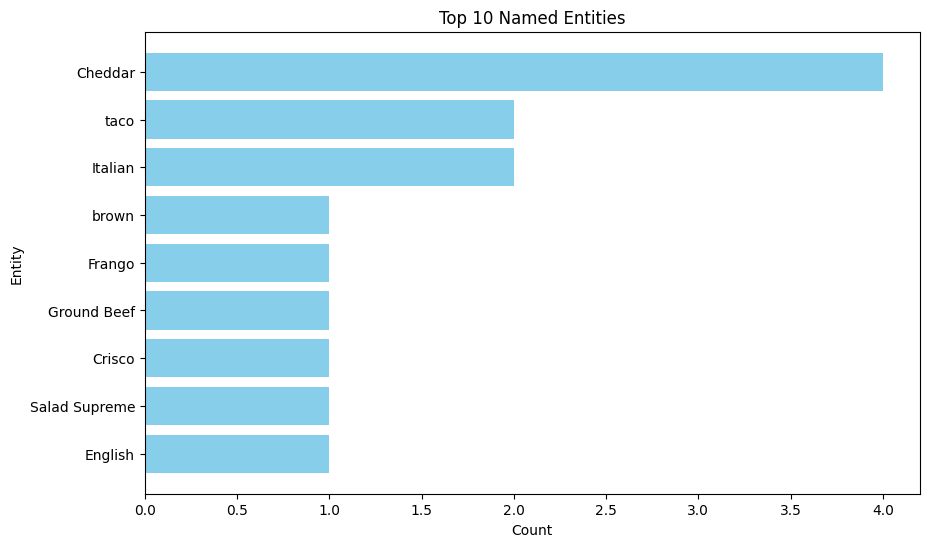

In [111]:

"""def count_entities(entity_list):
    entity_count = {}
    for entities in entity_list:
        for entity in entities:
            entity_count[entity] = entity_count.get(entity, 0) + 1
    return entity_count

all_named_entities = recipe_df_50['named_entities'].tolist()
entity_count = count_entities(all_named_entities)

sorted_entity_count = dict(sorted(entity_count.items(), key=lambda item: item[1], reverse=True))


top_n = 10  
top_entities = list(sorted_entity_count.keys())[:top_n]
top_entity_counts = list(sorted_entity_count.values())[:top_n]

plt.figure(figsize=(10, 6))
plt.barh(top_entities, top_entity_counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Entity')
plt.title('Top 10 Named Entities')
plt.gca().invert_yaxis()
plt.show()"""

In [112]:
ingredients_df = ingredients_df.drop('continent', axis=1)
ingredients_df

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57686,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57687,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57688,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57689,Japan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [113]:
ingredients_df.columns

Index(['country', 'almond', 'angelica', 'anise', 'anise_seed', 'apple',
       'apple_brandy', 'apricot', 'armagnac', 'artemisia',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=384)

In [114]:
country_counts = ingredients_df['country'].value_counts()

rare_countries = country_counts[country_counts < 5]

print("Classes with less than 5 examples:")
print(rare_countries)

Classes with less than 5 examples:
country
Bangladesh    4
Name: count, dtype: int64


In [115]:
ingredients_df_filtered = ingredients_df[~ingredients_df['country'].isin(rare_countries.index)]

# Split data into features and target
X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']

In [116]:
"""from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

X = ingredients_df_filtered.drop(columns=['country'])


y = ingredients_df_filtered['country']

models = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier()),
    ('SVM', SVC()),
    ('Logistic Regression', LogisticRegression())
]


pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    pipelines.append((name, pipeline))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# cross-validation
results = {}
for name, pipeline in pipelines:
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()


best_model_name = max(results, key=results.get)
best_pipeline = dict(pipelines)[best_model_name]
print("Best Model:", best_model_name)


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1) """

'from sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import train_test_split, cross_val_score\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.linear_model import LogisticRegression\n\nX = ingredients_df_filtered.drop(columns=[\'country\'])\n\n\ny = ingredients_df_filtered[\'country\']\n\nmodels = [\n    (\'Random Forest\', RandomForestClassifier()),\n    (\'KNN\', KNeighborsClassifier()),\n    (\'SVM\', SVC()),\n    (\'Logistic Regression\', LogisticRegression())\n]\n\n\npipelines = []\nfor name, model in models:\n    pipeline = Pipeline([\n        (\'model\', model)\n    ])\n    pipelines.append((name, pipeline))\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n# cross-validation\nresults = {}\nfor name, pipeline in pipelines:\n    scores = 

In [117]:
ingredients_df.head(2)

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [154]:
#Random Forest + KNN    MACRO
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']

models = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    pipelines.append((name, pipeline))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# cross-validation
results = {}


for name, pipeline in pipelines:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    results[name] = scores.mean()

print("Cross-validation results:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

best_model_name = max(results, key=results.get)
best_pipeline = dict(pipelines)[best_model_name]
print("\nBest Model:", best_model_name)


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

Cross-validation results:
Random Forest: 0.7009
KNN: 0.7048

Best Model: KNN

Test Accuracy: 0.7055815565955972
Test Precision: 0.1300156770583509
Test Recall: 0.05711949190254265
Test F1-score: 0.06871436715054043


c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [147]:
#Random Forest + KNN
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']

models = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    pipelines.append((name, pipeline))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# cross-validation
results = {}


for name, pipeline in pipelines:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    results[name] = scores.mean()

print("Cross-validation results:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

best_model_name = max(results, key=results.get)
best_pipeline = dict(pipelines)[best_model_name]
print("\nBest Model:", best_model_name)


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

Cross-validation results:
Random Forest: 0.7007
KNN: 0.7048

Best Model: KNN

Test Accuracy: 0.7055815565955972
Test Precision: 0.6042958282130925
Test Recall: 0.7055815565955972
Test F1-score: 0.638443896189235


c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
"""#RAndom Forest with gridsearch -> too much
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


rf_model = RandomForestClassifier(n_estimators=100, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)


pipeline = Pipeline([
    ('model', rf_model)
])

# grid search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__bootstrap': [True, False]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_

# Evaluate the best model with cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation results:")
print(f"Mean CV Score: {cv_scores.mean()}")

best_model.fit(X_train, y_train)

# Evaluate 
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)"""

'#RAndom Forest with gridsearch -> too much\nfrom sklearn.model_selection import train_test_split, GridSearchCV\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.pipeline import Pipeline\nfrom sklearn.model_selection import StratifiedKFold, cross_val_score\nfrom sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score\n\n\nX = ingredients_df_filtered.drop(columns=[\'country\'])\ny = ingredients_df_filtered[\'country\']\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)\n\n\nrf_model = RandomForestClassifier(n_estimators=100, \n                               random_state=42, \n                               max_features = \'sqrt\',\n                               n_jobs=-1, verbose = 1)\n\n\npipeline = Pipeline([\n    (\'model\', rf_model)\n])\n\n# grid search\nparam_grid = {\n    \'model__n_estimators\': [100, 200, 300],\n    \'model__max_depth\': [None, 10, 20, 30],\n    \'model__min_samples

In [123]:
# Logistic Regression Base Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = ingredients_df.drop(columns=['country'])
y = ingredients_df['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary??


log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.7282260161192478
Test Precision: 0.6463806782391858
Test Recall: 0.7282260161192478
Test F1-score: 0.6695327176438631
Confusion Matrix:
 [[   0   12    0 ...    0    0    0]
 [   1 7724   38 ...    3    0    1]
 [   0  104   90 ...    2    0    0]
 ...
 [   0   19    0 ...   45    0    2]
 [   0    3    0 ...    0    0    0]
 [   0   76    0 ...    1    0   11]]


c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [155]:
# Logistic Regression Base Model    MACRO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = ingredients_df.drop(columns=['country'])
y = ingredients_df['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg_model = LogisticRegression(max_iter=1000)  # Increase max_iter if necessary??


log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)


print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Test Accuracy: 0.7282260161192478
Test Precision: 0.18114160999182344
Test Recall: 0.09193537532850363
Test F1-score: 0.11211268215362032
Confusion Matrix:
 [[   0   12    0 ...    0    0    0]
 [   1 7724   38 ...    3    0    1]
 [   0  104   90 ...    2    0    0]
 ...
 [   0   19    0 ...   45    0    2]
 [   0    3    0 ...    0    0    0]
 [   0   76    0 ...    1    0   11]]


c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
#Random with grid search but estim.<
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


param_grid = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

pipeline = Pipeline([
    ('model', RandomForestClassifier(n_estimators=100, 
                                      random_state=42, 
                                      max_features='sqrt',
                                      n_jobs=-1, verbose=1))
])

# Grid search 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation results:")
print(f"Mean CV Score: {cv_scores.mean()}")


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0

Cross-validation results:
Mean CV Score: 0.7116080347324786


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.4s
[Parallel(n_jobs=20)]: Done 200 out of 200 | elapsed:    0.5s finished
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Accuracy: 0.7132951984746057
Test Precision: 0.5902545184786162
Test Recall: 0.7132951984746057
Test F1-score: 0.616904998400308


In [129]:
#Random con bay
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Hyperpar bay
param_space = {
    'model__n_estimators': Integer(100, 300),
    'model__max_depth': Integer(3, 30),
    'model__min_samples_split': Integer(2, 10),
    'model__min_samples_leaf': Integer(1, 10),
    'model__bootstrap': Categorical([True, False])
}

pipeline = Pipeline([
    ('model', RandomForestClassifier(n_estimators=100, 
                                      random_state=42, 
                                      max_features='sqrt',
                                      n_jobs=-1, verbose=1))
])

#  bayesian Ottimi
bayes_search = BayesSearchCV(estimator=pipeline, search_spaces=param_space, n_iter=50, cv=5, scoring='accuracy')
bayes_search.fit(X_train, y_train)


best_model = bayes_search.best_estimator_


cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-validation results:")
print(f"Mean CV Score: {cv_scores.mean()}")


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    3.2s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=20)]: Done 244 out of 244 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 244 out of 244 | elapsed:    3.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Do

Cross-validation results:
Mean CV Score: 0.7102862344390657


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    7.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.3s



Test Accuracy: 0.7121684867394695
Test Precision: 0.6020002520217511
Test Recall: 0.7121684867394695
Test F1-score: 0.6119004686533873


[Parallel(n_jobs=20)]: Done 300 out of 300 | elapsed:    0.6s finished
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [132]:
"""from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']

models = [
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'))
]


pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    pipelines.append((name, pipeline))


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


results = {}
for name, pipeline in pipelines:
    print(f"Training and cross-validating {name}...")
    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = scores.mean()
    print(f"{name} cross-validation accuracy: {scores.mean()}")


best_model_name = max(results, key=results.get)
best_pipeline = dict(pipelines)[best_model_name]
print("\nBest Model:", best_model_name)


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nEvaluation on the test set:")
print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)


print("\nCross-validation results:")
for name, score in results.items():
    print(f"{name}: {score:.4f}") """

'from sklearn.ensemble import GradientBoostingClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.neural_network import MLPClassifier\nfrom xgboost import XGBClassifier\nX = ingredients_df_filtered.drop(columns=[\'country\'])\ny = ingredients_df_filtered[\'country\']\n\nmodels = [\n    (\'Gradient Boosting\', GradientBoostingClassifier()),\n    (\'XGBoost\', XGBClassifier(use_label_encoder=False, eval_metric=\'mlogloss\'))\n]\n\n\npipelines = []\nfor name, model in models:\n    pipeline = Pipeline([\n        (\'model\', model)\n    ])\n    pipelines.append((name, pipeline))\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n\n\nresults = {}\nfor name, pipeline in pipelines:\n    print(f"Training and cross-validating {name}...")\n    scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring=\'accuracy\')\n    results[name] = scores.mean()\n    print(f"{name} cross-validation accu

In [ ]:
ingredients_df.head(3)

,country,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Vietnamese,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Try new tec with logreg

In [157]:
#troppo tempo
"""from sklearn.linear_model import LogisticRegressionCV

X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg_model_balanced = LogisticRegressionCV(class_weight='balanced', max_iter=20000)

log_reg_model_balanced.fit(X_train, y_train)

y_pred_balanced = log_reg_model_balanced.predict(X_test)

accuracy_balanced = accuracy_score(y_test, y_pred_balanced)
precision_balanced = precision_score(y_test, y_pred_balanced, average='weighted')
recall_balanced = recall_score(y_test, y_pred_balanced, average='weighted')
f1_balanced = f1_score(y_test, y_pred_balanced, average='weighted')
conf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)

print("Balanced Test Accuracy:", accuracy_balanced)
print("Balanced Test Precision:", precision_balanced)
print("Balanced Test Recall:", recall_balanced)
print("Balanced Test F1-score:", f1_balanced)
print("Balanced Confusion Matrix:\n", conf_matrix_balanced)"""

'from sklearn.linear_model import LogisticRegressionCV\n\nX = ingredients_df_filtered.drop(columns=[\'country\'])\ny = ingredients_df_filtered[\'country\']\n\n\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)\n\nlog_reg_model_balanced = LogisticRegressionCV(class_weight=\'balanced\', max_iter=20000)\n\nlog_reg_model_balanced.fit(X_train, y_train)\n\ny_pred_balanced = log_reg_model_balanced.predict(X_test)\n\naccuracy_balanced = accuracy_score(y_test, y_pred_balanced)\nprecision_balanced = precision_score(y_test, y_pred_balanced, average=\'weighted\')\nrecall_balanced = recall_score(y_test, y_pred_balanced, average=\'weighted\')\nf1_balanced = f1_score(y_test, y_pred_balanced, average=\'weighted\')\nconf_matrix_balanced = confusion_matrix(y_test, y_pred_balanced)\n\nprint("Balanced Test Accuracy:", accuracy_balanced)\nprint("Balanced Test Precision:", precision_balanced)\nprint("Balanced Test Recall:", recall_balanced)\nprint("Bala

In [158]:

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = ingredients_df.drop(columns=['country'])
y = ingredients_df['country']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


model = XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="macro",zero_division=1)
recall = recall_score(y_test, y_pred, average="macro",zero_division=1)
f1 = f1_score(y_test, y_pred,average="macro", zero_division=1)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.67302192564347
Precision: 0.3229103176430497
Recall: 0.10419618895965249
F1-score: 0.11706463870352796


In [145]:
#'SVC'
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = ingredients_df.drop(columns=['country'])
y = ingredients_df['country']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


model = SVC()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=1)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=1)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=1)


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.731519195770864
Precision: 0.7069492829893658
Recall: 0.731519195770864
F1-score: 0.648810150349993


In [ ]:
#accuracy,precision,recall,f1 score for evry class?

In [ ]:
#logistic regression

In [174]:
# Logistic Regression Base Model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = ingredients_df.drop(columns=['country'])
y = ingredients_df['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg_model = LogisticRegression(max_iter=5000,)  # Increase max_iter if necessary??


log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)


print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.7282260161192478
Test Precision: 0.6463806782391858
Test Recall: 0.7282260161192478
Test F1-score: 0.6695327176438631
Confusion Matrix:
 [[   0   12    0 ...    0    0    0]
 [   1 7724   38 ...    3    0    1]
 [   0  104   90 ...    2    0    0]
 ...
 [   0   19    0 ...   45    0    2]
 [   0    3    0 ...    0    0    0]
 [   0   76    0 ...    1    0   11]]

Classification Report:
                         precision    recall  f1-score   support

                African       0.00      0.00      0.00        23
               American       0.78      0.96      0.86      8031
                  Asian       0.41      0.38      0.39       235
                Austria       0.00      0.00      0.00         4
             Bangladesh       0.00      0.00      0.00         1
                Belgium       0.00      0.00      0.00         2
           Cajun_Creole       0.31      0.17      0.22        29
                 Canada       0.00      0.00      0.00       155
        

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [165]:
country_counts = ingredients_df['country'].value_counts()

print("Number of unique countries and their counts:")
print(country_counts)

less_than_50 = country_counts[country_counts < 20].count()
more_than_50 = country_counts[country_counts >= 20].count()

print(f"\nNumber of classes with less than 50 observations: {less_than_50}")
print(f"Number of classes with 50 or more observations: {more_than_50}")

filtered_countries = country_counts[country_counts >= 20].index

filtered_ingredients_df = ingredients_df[ingredients_df['country'].isin(filtered_countries)]

Number of unique countries and their counts:
country
American        40150
Mexico           1754
Italian          1715
Italy            1461
Asian            1176
                ...  
Indonesia          12
Belgium            11
East-African       11
Israel              9
Bangladesh          4
Name: count, Length: 69, dtype: int64

Number of classes with less than 50 observations: 12
Number of classes with 50 or more observations: 57


In [169]:
# macro + test_size=0.3

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


X = filtered_ingredients_df.drop(columns=['country'])
y = filtered_ingredients_df['country']


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


model = XGBClassifier()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred,average="macro")
recall = recall_score(y_test, y_pred,average="macro")
f1 = f1_score(y_test, y_pred,average="macro")


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


Accuracy: 0.715874855156431
Precision: 0.254635624526769
Recall: 0.10571572270399625
F1-score: 0.13372085498767702

Classification Report:
              precision    recall  f1-score   support

           0       0.05      0.03      0.04        32
           1       0.78      0.95      0.86     12075
           2       0.29      0.27      0.28       347
           3       0.00      0.00      0.00         9
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00       222
           6       0.33      0.02      0.03        56
           7       0.05      0.01      0.02        69
           8       0.29      0.05      0.08        44
           9       0.03      0.02      0.02        66
          10       0.30      0.05      0.08        61
          11       0.00      0.00      0.00        39
          12       0.17      0.02      0.03        58
          13       1.00      0.08      0.14        77
          14       0.36      0.09      0.15       

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))

In [170]:
#Random Forest + KNN    MACRO
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression



X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']

models = [
    ('Random Forest', RandomForestClassifier()),
    ('KNN', KNeighborsClassifier())
]

pipelines = []
for name, model in models:
    pipeline = Pipeline([
        ('model', model)
    ])
    pipelines.append((name, pipeline))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# cross-validation
results = {}


for name, pipeline in pipelines:
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    results[name] = scores.mean()

print("Cross-validation results:")
for model, score in results.items():
    print(f"{model}: {score:.4f}")

best_model_name = max(results, key=results.get)
best_pipeline = dict(pipelines)[best_model_name]
print("\nBest Model:", best_model_name)


best_pipeline.fit(X_train, y_train)


y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

Cross-validation results:
Random Forest: 0.7035
KNN: 0.7030

Best Model: Random Forest


c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Accuracy: 0.7032992430808344
Test Precision: 0.16029398946528467
Test Recall: 0.06020400170533129
Test F1-score: 0.07648621246972549

Classification Report:
                         precision    recall  f1-score   support

                African       0.00      0.00      0.00        34
               American       0.77      0.96      0.86     12046
                  Asian       0.29      0.26      0.27       353
                Austria       0.25      0.17      0.20         6
                Belgium       0.00      0.00      0.00         3
           Cajun_Creole       0.00      0.00      0.00        44
                 Canada       0.06      0.01      0.02       232
              Caribbean       0.14      0.02      0.03        55
  Central_SouthAmerican       0.05      0.03      0.04        72
                  China       0.00      0.00      0.00        39
                Chinese       0.06      0.03      0.04        68
           East-African       0.00      0.00      0.00  

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [176]:
# Logistic Regression Base Model    MACRO  test 0.3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

X = filtered_ingredients_df.drop(columns=['country'])
y = filtered_ingredients_df['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

log_reg_model = LogisticRegression(max_iter=10000)  # Increase max_iter if necessary??


log_reg_model.fit(X_train, y_train)


y_pred = log_reg_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')


print("Test Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Accuracy: 0.7272885283893396
Test Precision: 0.29396927490704017
Test Recall: 0.11958976196425945
Test F1-score: 0.15162981807549206

Classification Report:
                         precision    recall  f1-score   support

                African       0.18      0.06      0.09        35
               American       0.78      0.96      0.86     12045
                  Asian       0.39      0.36      0.38       353
                Austria       0.00      0.00      0.00         6
           Cajun_Creole       0.42      0.18      0.25        44
                 Canada       0.00      0.00      0.00       232
              Caribbean       0.00      0.00      0.00        55
  Central_SouthAmerican       0.20      0.01      0.03        72
                  China       0.25      0.05      0.09        39
                Chinese       0.33      0.12      0.17        68
         Eastern-Europe       0.33      0.01      0.03        71
EasternEuropean_Russian       0.43      0.07      0.12   

c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
#Random with grid search but estim.<  test 0.3
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X = ingredients_df_filtered.drop(columns=['country'])
y = ingredients_df_filtered['country']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


param_grid = {
    'model__n_estimators': [100, 150, 200],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2],
    'model__bootstrap': [True, False]
}

pipeline = Pipeline([
    ('model', RandomForestClassifier(n_estimators=100, 
                                      random_state=42, 
                                      max_features='sqrt',
                                      n_jobs=-1, verbose=1))
])

# Grid search 
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X_train, y_train)


best_model = grid_search.best_estimator_


cv_scores = cross_val_score(best_model, X_train, y_train, cv=cv, scoring='accuracy')
print("Cross-validation results:")
print(f"Mean CV Score: {cv_scores.mean()}")


best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("\nTest Accuracy:", accuracy)
print("Test Precision:", precision)
print("Test Recall:", recall)
print("Test F1-score:", f1)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0

Cross-validation results:
Mean CV Score: 0.711812778603269


[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 100 out of 100 | elapsed:    0.3s finished
c:\Users\cunia\.pyenv\pyenv-win\versions\3.11.3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Test Accuracy: 0.7118506962500722
Test Precision: 0.060551995037200136
Test Recall: 0.030737072166366935
Test F1-score: 0.033372858408307046


## Simple generator code

In [ ]:
# Example structure of the data
# data = {
#     'recipe_name': ['Pasta Carbonara', 'Chicken Curry'],
#     'ingredients': [['pasta', 'egg', 'cheese', 'bacon'], ['chicken', 'curry powder', 'coconut milk', 'rice']],
#     'instructions': ['Boil pasta, mix with egg and cheese, add bacon', 'Cook chicken, add curry powder, stir in coconut milk, serve with rice']
# }

# Convert ingredients from strings to lists
data['ingredients'] = data['ingredients'].apply(lambda x: x.strip('[]').replace("'", "").split(', '))

NameError: name 'data' is not defined

In [ ]:
import random

def generate_recipe(data, num_ingredients=5):
    all_ingredients = [ingredient for sublist in data['ingredients'] for ingredient in sublist]
    new_ingredients = random.sample(all_ingredients, num_ingredients)

    # Generate a simple instruction
    instructions = f"Combine the following ingredients: {', '.join(new_ingredients)}. Cook as desired."

    return {
        'name': 'Generated Recipe',
        'ingredients': new_ingredients,
        'instructions': instructions
    }

new_recipe = generate_recipe(data)

In [ ]:
def format_recipe(recipe):
    formatted_recipe = f"Recipe Name: {recipe['name']}\n\n"
    formatted_recipe += "Ingredients:\n"
    for ingredient in recipe['ingredients']:
        formatted_recipe += f"- {ingredient}\n"
    formatted_recipe += "\nInstructions:\n"
    formatted_recipe += recipe['instructions']
    return formatted_recipe

print(format_recipe(new_recipe))

In [ ]:
new_recipe = generate_recipe(data)
print(format_recipe(new_recipe))